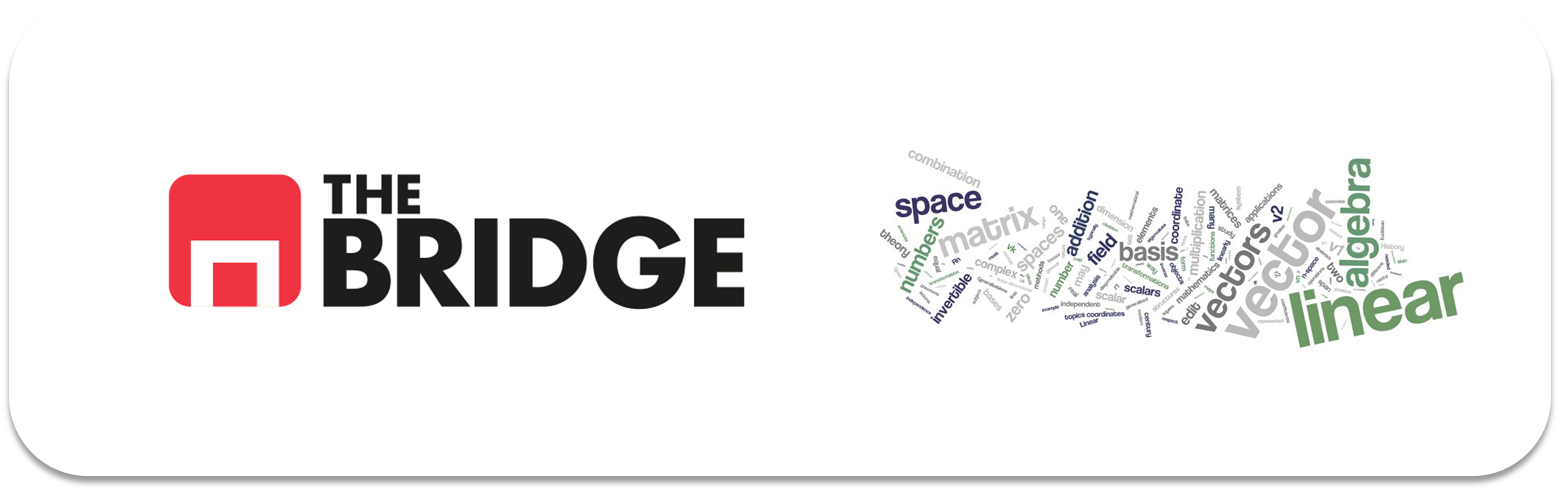

# Clases Extraescolares: Ampliación de Vectores

## Contenidos

* [Introduccion](#Introduccion)  

* [Similitud segun el angulo](#Similitud-segun-el-angulo)  

* [El producto escalar de vectores](#El-producto-escalar-de-vectores)  

* [Normas, magnitudes y longitudes](#Normas,-magnitudes-y-longitudes)  

* [Angulo entre dos vectores](#Angulo-entre-dos-vectores)  

* [Solución utilizando similitud del coseno o simcos](#Solución-utilizando-similitud-del-coseno-o-simcos)  



### Introduccion  

[al indice](#Contenidos)  



En la sesión anterior introdujimos los vectores para apoyarnos en ellos y que Dena Aidone pudiera resolver su problema de repartir alumnos en clases extraescolares. 

Recordando el proceso muy brevemente:
1. **Caracterizamos** a sus alumnos con dos características (***features*** en inglés [esto es nuevo]) su gusto por "Volar" [lo que quiera que sea eso] y su preferencia por la "Comida".


In [7]:
alumnos_aidone = {
    "Rodrigo": [5,4],
    'Lucia': [2, -3],
    'Alejandro': [3, 5],
    'Valeria': [-5, 4],
    'Javier': [0, -1],
    'Camila': [3, 2],
    'Diego': [-1, 1],
    'Gabriela': [5, -2],
    'Mateo': [-5, 3],
    'Sofía': [-5, 1]
}


2. Convertimos (conceptualmente) esas **características en vectores** (básicamente en una lista de valores numéricos)
3. Aplicamos la definición de **distancia** entre vectores para relacionar los alumnos entre sí.


In [8]:
import math

def distancia_2d(vec1, vec2, precision = 2): # Esperamos vectores de 2 dimensiones, es decir "listas" con longitud 2
    suma = 0
    for indice_componente in range(2): # 2 por ser la cardinalidad (número de componentes del vector)
        suma += (vec1[indice_componente] - vec2[indice_componente])**2
    distancia = math.sqrt(suma)
    distancia = round(distancia, precision)
    return distancia

4. **Escogimos** como clase extraescolar para cada alumno la del alumno de referencia del que le separaba **la menor distancia**.

In [10]:
alumnos_ref = ["Rodrigo","Gabriela","Mateo"]
curso_asignado = ["CAI","ER","NMPC"]
diccionario_reparto = {}

for alumno, vector in alumnos_aidone.items(): # Recorremos el diccionario donde tenemos el vector que caracteriza 
    # cada alumno
    
    distancia_minima = 99999999 # Por ahora cualquier distancia a los 
    #alumons de referencia es buena
    
    indice_distancia_minima = -1 # Tenemos un indice al curso-alumno de referencia
    diccionario_reparto[alumno] = {"distancias": [], "curso_elegido": ""}
    # Creamos una colección, un diccionario para almacenar los resultados

    for indice_curso,alumno_ref in enumerate(alumnos_ref): # Y ahora el bucle para 
        # calcular la distancia a los vectores de los alumnos de referencia
        vec_ref = alumnos_aidone[alumno_ref] # Recuperamos el vector que 
        # caracteriza al alumno de referencia
        
        distancia = distancia_2d(vector, vec_ref, 1) # Obtenemos la distancia 
        # con el alumno del bucle principal
        if distancia < distancia_minima: # Y vemos si es menor que #
            # la distancia mínima última para el alumno del bucle principal
            distancia_minima = distancia # Si lo es, actualizamos 
            #la nueva distancia mínima
            indice_distancia_minima = indice_curso # Y actualizamos 
            # el indice del curso escogido
        
        diccionario_reparto[alumno]["distancias"].append(distancia) 
        # en cualquier caso me guardo la distancia calculada...
        diccionario_reparto[alumno]["curso_elegido"] = \
        curso_asignado[indice_distancia_minima] # Traduzo el indice del curso al curso
    print(f"Para {alumno}, el curso asignado es " + \
          f"{diccionario_reparto[alumno]['curso_elegido']}") # Y vamos volcando 
        # la elección de nuestro algoritmo


Para Rodrigo, el curso asignado es CAI
Para Lucia, el curso asignado es ER
Para Alejandro, el curso asignado es CAI
Para Valeria, el curso asignado es NMPC
Para Javier, el curso asignado es ER
Para Camila, el curso asignado es CAI
Para Diego, el curso asignado es NMPC
Para Gabriela, el curso asignado es ER
Para Mateo, el curso asignado es NMPC
Para Sofía, el curso asignado es NMPC


Tambien comentamos que podíamos aprovechar otro concepto asociado a los vectores (y sobre el que volveremos más adelante en el curso), el *producto escalar*

Pero antes hablemos de otra forma de ver el parecido entre nuestros alumnos

### Similitud segun el angulo  

[al indice](#Contenidos)  



Volvamos por un momento a la representación gráfica de los vectores de Rodrigo, Gabriela, Mateo y Lucia que vimos en la anterior sesión:

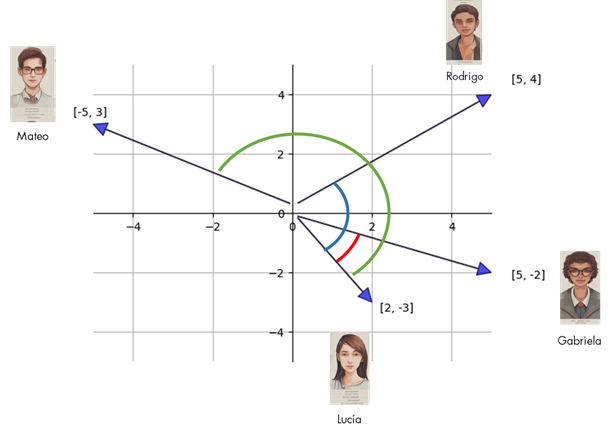

Ahora, la profesora Aidone ha destacado los ángulos (los arcos de diferentes colores que forman cada pareja de vectores de Lucia con el resto de alumnos de referencia)

Si te fijas, la amplitud de ese ángulo también parece una buena medida de lo parecidos que son... si tuvieramos una forma de obtener ese ángulo o una medida parecida... evidentemente la hay y por supuesto, como ya habrás imaginado, tiene que ver con el...

### El producto escalar de vectores  

[al indice](#Contenidos)  



El [producto escalar](https://es.wikipedia.org/wiki/Producto_escalar) de dos vectores se define como la suma de los productos de sus elementos, suele representarse matemáticamente como < x, y > o x'y, donde x e y son dos vectores.

$$< x, y > := \sum_{i=1}^n x_i y_i$$


Con un ejemplo sobre nuestra clase: 

$$< Valeria , Alejandro > := \sum_{i=0}^1 Valeria_i * Alejandro_i$$

Como:

$Valeria = [-5,4]$  
$Alejandro = [3, 5]$

Sustituyendo:

$$< Valeria , Alejandro > := (-5 * 3) + (4 * 5) = -15 + 20 = 5$$

El producto escalar de los vectores que caracterizan a Valeria y a Alejandro es 5. Fijate que el resultado no es otro vector sino un número, por eso se denomina *producto escalar*

En **terminología de Algebra**, un número (cualquier número) es un **"escalar"** [nada que ver con nuestra clase de escalar con robots, no nos hagamos un lío], y una secuencia de escalares es un **"vector"**. Por ejemplo:

* $12$, $-21$ y $\sqrt2$ cada uno son *escalares* 
* $[12,-21]$ y $[\sqrt3, -0.12, 1/5]$ son *vectores*

Como la profesora Aidone quería tener otro algoritmo alternativo, decidió programarse su función para calcular el producto escalar, en inglés *dot product*, vamos a ello

In [14]:
def dot_product(vec1, vec2, precision = 2):
    producto = 0
    for indice in range(len(vec1)):
        producto += (vec1[indice]*vec2[indice])
    producto = round(producto, precision)
    return producto

Comprobemos para el producto de Valeria y Alejandro (el de sus vectores de características, claro):

In [15]:
vec_valeria = alumnos_aidone["Valeria"]
vec_alejandro = alumnos_aidone["Alejandro"]
dot_product(vec_valeria, vec_alejandro)

5

Muy bien. Dos apuntes antes de seguir:
1. Es conmutativo, da igual el orden:  $<vec1,vec2>$ == $<vec2,vec1>$
2. Aunque estamos trabajando con vectores de dos dimensiones o componentes se aplica a cualquier cardinalidad o dimensionalidad de los vectores.


¿Y esto que tiene que ver con el ángulo que tanto queríamos obtener para poder resolver el problema de las clases extraescolares de otra forma?

Pues tiene que ver, paciencia, pero antes hablemos de Normas, magnitudes y longitudes

### Normas, magnitudes y longitudes  

[al indice](#Contenidos)  



En realidad son conceptos análogos en el caso de vectores (y en concreto de vectores con menos de cuatro dimensiones o componentes). Recuerda que en la sesión anterior definimos los vectores como: una **entidad matemática** que tiene tanto magnitud (o longitud) como dirección.

La norma es otra forma de denominar a esa magnitud o esa longitud, es decir lo "largo" que es el vector (concepto que podeos observar perfectamente cuando el vector tiene 2 dimensiones como es el caso de las características de los alumnas y alumnos de la profesora Aidone).



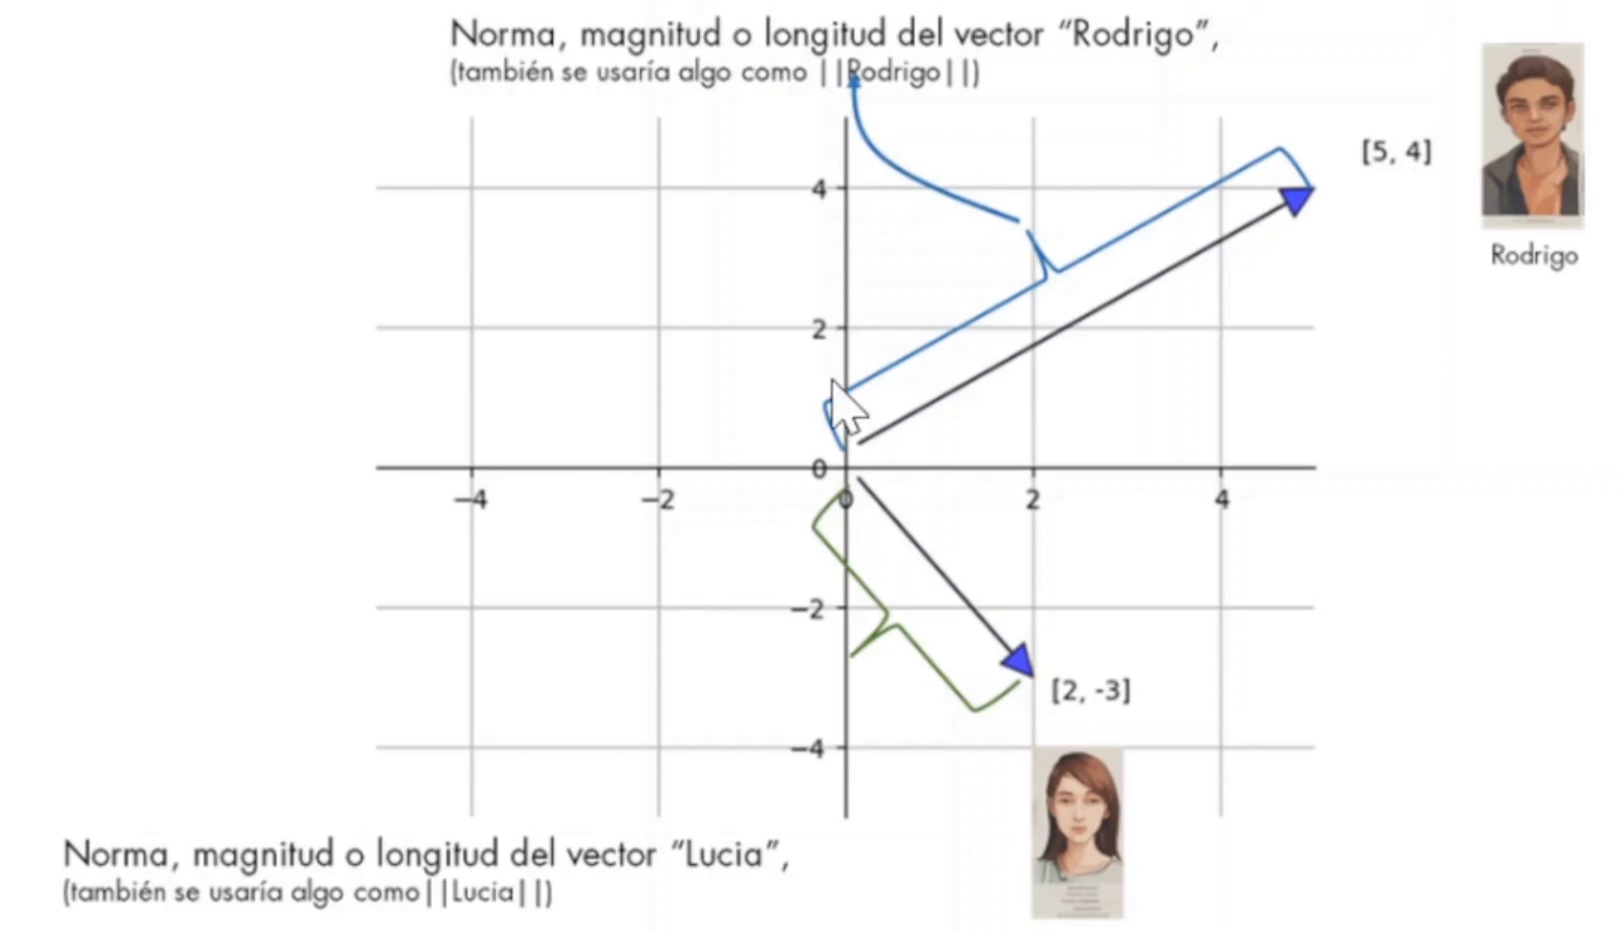

Lo formal, es decir que todo producto escalar induce una [norma](https://es.wikipedia.org/wiki/Norma_vectorial) sobre el espacio en el que está definido, pero no hace falta que te quedes con esto. La fórmula de la norma de un vector es:

$$\| x \| := \sqrt{< x, x>} := \left( \sum_{i=1}^n x_i^2 \right)^{1/2}$$




Es decir la raiz cuadrada del producto escalar del vector por sí mismo... (no te rompas la cabeza con ello, quedate con que es así y es la forma de obtener la longitud del vector)



Para Lucia ( $[ x_1 = 2, x_2 = -3]$):

$||Lucia|| = \sqrt{<Lucia,Lucia>} = \sqrt{(x_1 * x_1)+(x_2 * x_2)} = \sqrt{( 2 * 2 )+(-3 * -3)} = \sqrt{4+9} = \sqrt{13} \approx 3.6$

In [16]:
def norm_vec(vec, precision = 1):
    escalar = dot_product(vec, vec, precision)
    resultado = math.sqrt(escalar)
    resultado = round(resultado, precision)
    return resultado

Y lo probamos con Lucia

In [18]:
vec_lucia = alumnos_aidone["Lucia"]
norm_vec(vec_lucia)

3.6

### Angulo entre dos vectores  

[al indice](#Contenidos)  



Ya casi estamos, nos queda saber cuál es la relación entre el producto escalar entre dos vectores y el ángulo o una función del ángulo que forman esos dos vectores.

Esa relación viene dada por esta función (tampoco hace falta que la memorices, sólo que sepas de su existencia):

$<vec1, vec2> = vec1 \cdot vec2 = ||vec1|| * ||vec2|| * cos(\theta)$

Donde $vec_1$ y $vec_2$ son los dos vectores de los que queremos saber el ángulo o una función del ángulo y $\theta$ es el ángulo que forman esos dos vectores.

Despejando:

$cos(\theta)= \frac{vec1 \cdot vec2}{||vec1|| * ||vec2||}$

Es decir que conociendo las normas y el producto escalar podemos obtener el coseno del angulo que forman. Sin que tengas que recordar la trigonometría de la ESO, el bachillerato, el EGB, o lo que sea, sólo debes recordar que el coseno de un ángulo tiene valores entre -1 y 1 y que es mayor a medida que el ángulo es más pequeño y menor a medida que el ángulo es mayor.

En concreto:

$cos(0º) = 1$ -> Vectores superpuestos   
$cos(90) = 0$ -> Vectores perpendiculares  
$cos(180º) = -1$ -> Vectores apuntando en sentidos contrarios

Gráficamente:


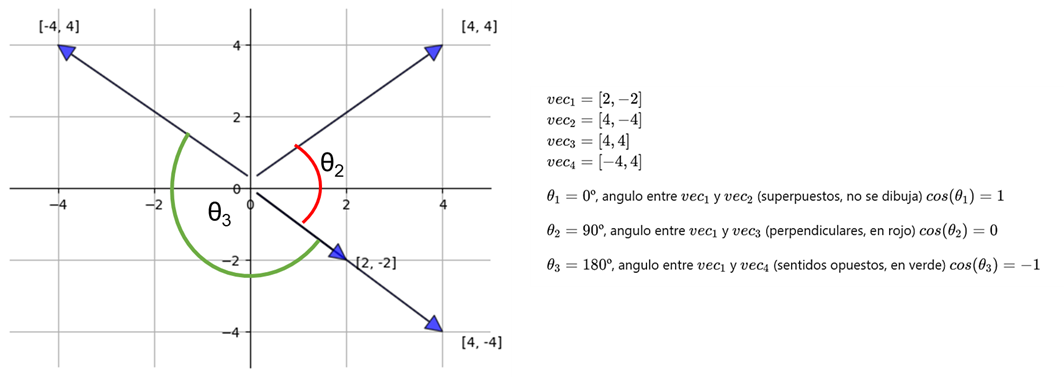


En definitiva que a medida que el coseno se hace más pequeño menor es la similitud y viceversa.

Apliquémoslo sobre un ejemplo de nuestro problema, obtengamos el coseno del ángulo ($\theta$) entre Lucia y Gabriela:

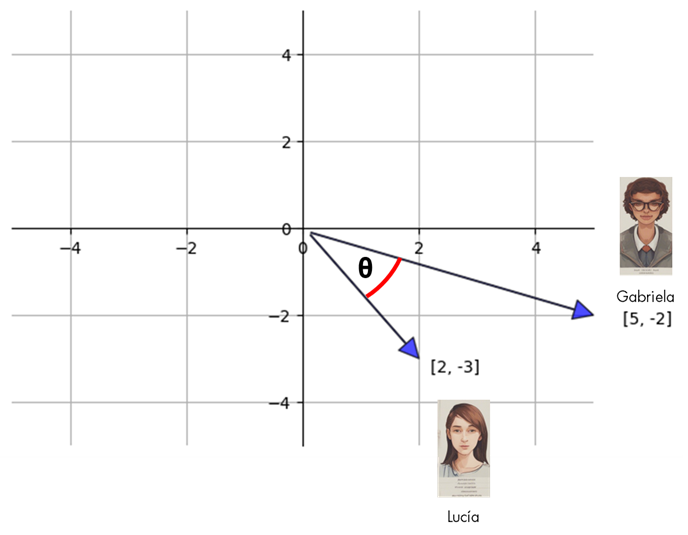

Partiendo de:  

Lucia = $[Vuelo = 2, Comida = -3]$  
Gabriela = $[Vuelo = 5, Comida = -2]$

Aplicamos:  

$cos(\theta) = \frac{Lucia \cdot Gabriela}{||Lucia||*||Gabriela||}$
  

Por partes: 
* $||Lucia|| = \sqrt{(2 * 2) + (-3 * -3)} \approx 3.6$
* $||Gabriela|| = \sqrt{(5 * 5) + (-2 * -2)} \approx 5.4$
* $Lucia \cdot Gabriela = (2 * 5) + (-3 * -2) = 16$

$cos(\theta) = \frac{16}{3.6 * 5.4} \approx 0.82$

El resultado es de 0.82 bastante cercano a 1, cómo esperábamos porque el ángulo que separa a Lucia y a Gabriela parece pequeño. Puedes comprobar a mano que los cosenos de los ángulos de Lucia con Rodrigo y Mateo son menores.

Ahora vamos a hacerlo programando, de nuevo construireos sobre las funciones que ya tenemos (**dot_product** y **norm_vec**):

In [21]:
def cos_vec(vec1, vec2, precision = 2):
    resultado = dot_product(vec1,vec2)/(norm_vec(vec1)*norm_vec(vec2))
    resultado = round(resultado, precision)
    return resultado

In [22]:
vec_lucia = alumnos_aidone["Lucia"]
vec_gabriela = alumnos_aidone["Gabriela"]
cos_vec(vec_lucia, vec_gabriela, 2)

0.82

Y ya lo tenemos, ahora podemos usar el coseno entre los vectores para decidir cuanto de similares son los alumnos, pero ojo hay una diferencia importante respecto a usar las distancias... ¿Cuál es?

Mientras te lo piensas, te dejo aquí el código modificado del algoritmo basado en distancia de forma que se use el coseno (a este forma también se le denominada similitud del coseno o simcos)

### Solución utilizando similitud del coseno o simcos  

[al indice](#Contenidos)  



In [23]:
alumnos_ref = ["Rodrigo","Gabriela","Mateo"]
curso_asignado = ["CAI","ER","NMPC"]
diccionario_reparto = {}

for alumno, vector in alumnos_aidone.items():
    coseno_maximo = -1 
    indice_coseno_maximo = -1
    diccionario_reparto[alumno] = {"cosenos": [], "curso_elegido": ""}
    for indice_curso,alumno_ref in enumerate(alumnos_ref):
        vec_ref = alumnos_aidone[alumno_ref]
        coseno = cos_vec(vector, vec_ref, 1)
        if coseno > coseno_maximo: 
            coseno_maximo = coseno
            indice_coseno_maximo = indice_curso
        diccionario_reparto[alumno]["cosenos"].append(coseno) 
        diccionario_reparto[alumno]["curso_elegido"] = curso_asignado[indice_coseno_maximo]
    print(f"Para {alumno}, el curso asignado es {diccionario_reparto[alumno]['curso_elegido']}")

Para Rodrigo, el curso asignado es CAI
Para Lucia, el curso asignado es ER
Para Alejandro, el curso asignado es CAI
Para Valeria, el curso asignado es NMPC
Para Javier, el curso asignado es ER
Para Camila, el curso asignado es CAI
Para Diego, el curso asignado es NMPC
Para Gabriela, el curso asignado es ER
Para Mateo, el curso asignado es NMPC
Para Sofía, el curso asignado es NMPC


Ejecutamos... Y como era de esperar este algoritmo nos ha dado la misma solución... Entonces ¿para qué tenemos dos? [Lo explicaremos en la sesión en vivo  pero piensa en las diferencias entre uno y otro mientras tanto]